In [86]:
import datetime as dt
import pandas
import warnings
import japanize_matplotlib
warnings.simplefilter('ignore')

In [87]:
'''
毎日12時にコードの実行をかける
'''

'\n毎日12時にコードの実行をかける\n'

In [88]:
#本来はExcelデータを入力するようにする.
corona=pandas.read_excel('20210818hasseijoukyou.xlsx', header=1)
corona=corona[['番号','年代','性別','居住地','発症日','判明日','その他（＊）']]
corona=corona[corona['番号']!='※居住地にかかわらず、感染症の予防及び感染症の患者に対する医療に関する法律に基づき、栃木県及び宇都宮市に届け出のあった患者について掲載しています。（他県や検疫所に届け出があった患者は、他県等で公表されます。）\n※患者・御家族の人権尊重・個人情報保護に御理解と御配慮をお願いします。\n※退院日等の「退院」には、感染症法上の入院勧告等の解除及び県外保健所への入院等の対応依頼を含みます。\n(＊) 陽性者との接触の有無、感染に関与すると考えられる行動歴等  ']
corona=corona[corona['判明日']!='調査中']
corona=corona[corona['判明日']!='現在調査中']
corona=corona.reset_index()
for i in range(len(corona)):
    if type(corona['判明日'][i]) is int:
        corona['判明日'][i]=pandas.to_datetime('1900/1/1') + pandas.to_timedelta(corona['判明日'][i] - 1, unit='days')
#データの整形
corona=corona.dropna(how='all')
corona = corona.dropna(axis=0, subset=['番号'])
corona[corona['番号'].isnull()]
corona=corona[corona['番号']!=' ']
corona=corona.reset_index()
#当面の最終的な目標は, 2020年のデータと2021年のデータの区別ができるようにする.(暫定方法)
corona['Year']=0
corona['Month']=0
corona['判明日']=pandas.to_datetime(corona['判明日'], format='%Y-%m-%d %H:%M:%S')
corona['Year']=corona['判明日'].dt.year
corona['Month']=corona['判明日'].dt.month

<h1>全体データ</h1>

In [89]:
corona

,level_0,index,番号,年代,性別,居住地,発症日,判明日,その他（＊）,Year,Month
0,0,0,10781,30代,女性,宇都宮市,調査中,2021-08-18,※宇都宮市4002例目,2021,8
1,1,1,10780,10代,女性,宇都宮市,調査中,2021-08-18,※宇都宮市4001例目,2021,8
2,2,2,10779,10代,女性,宇都宮市,調査中,2021-08-18,10783･10784例目の家族\n※宇都宮市4000例目,2021,8
3,3,3,10778,10代,女性,宇都宮市,調査中,2021-08-18,10783･10785例目の家族\n※宇都宮市3999例目,2021,8
4,4,4,10777,40代,男性,宇都宮市,調査中,2021-08-18,10784･10785例目の家族\n※宇都宮市3998例目,2021,8
...,...,...,...,...,...,...,...,...,...,...,...
10768,10775,10784,5,40代,男性,フィリピン,NaN,2020-03-25,フィリピンから帰国,2020,3
10769,10776,10785,4,50代,男性,県南,NaN,2020-03-21,ポルトガル旅行,2020,3
10770,10777,10786,3,40代,女性,宇都宮,NaN,2020-03-19,タイ旅行 \n※宇都宮市1例目,2020,3
10771,10778,10787,2,30代,女性,県南,NaN,2020-03-06,大阪ライブハウス、ショッピングセンター勤務,2020,3


<h2>月別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

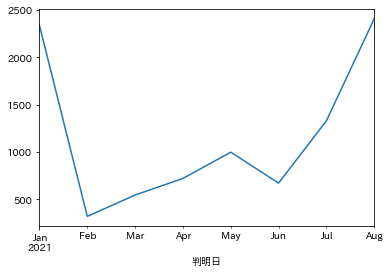

In [90]:
#2021年のデータを対象とする.
corona=corona[corona['Year']==2021]
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['Year'].plot()

In [91]:
corona.groupby(pandas.Grouper(key='判明日', freq='M')).count()['番号']

判明日
2021-01-31    2337
2021-02-28     322
2021-03-31     547
2021-04-30     722
2021-05-31     999
2021-06-30     673
2021-07-31    1330
2021-08-31    2407
Freq: M, Name: 番号, dtype: int64

<h2>居住地についての可視化</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

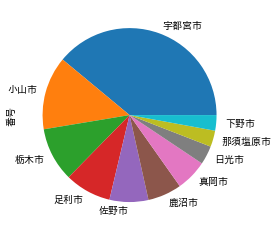

In [92]:
corona_place=corona.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [93]:
corona_place

居住地
宇都宮市     3056
小山市      1070
栃木市       787
足利市       676
佐野市       566
鹿沼市       494
真岡市       457
日光市       272
那須塩原市     237
下野市       226
Name: 番号, dtype: int64

<h2>年齢についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

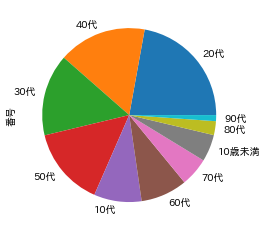

In [94]:
corona_nen=corona.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [95]:
corona_nen

年代
20代      2064
40代      1527
30代      1418
50代      1369
10代       825
60代       806
70代       497
10歳未満     468
80代       240
90代       105
Name: 番号, dtype: int64

<h2>性別についての可視化</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

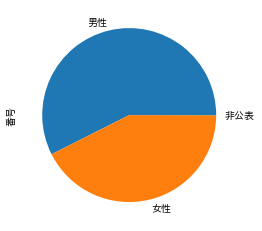

In [96]:
corona_sei=corona.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)

In [97]:
corona_sei

性別
男性     5363
女性     3970
非公表       4
Name: 番号, dtype: int64

<h2>日別コロナ数推移</h2>
<pre>
現状, 発症日をベースにすると調査中のデータが多い為判明日をベースにカウントする.
※発症数をcountで取る.
</pre>

<AxesSubplot:xlabel='判明日'>

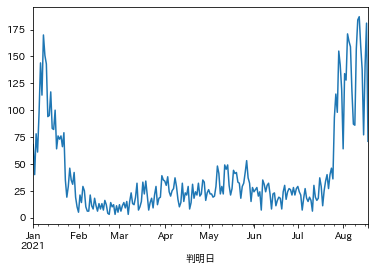

In [98]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['番号'].plot()

In [99]:
corona.groupby(pandas.Grouper(key='判明日', freq='D')).count()['番号']

判明日
2021-01-01     68
2021-01-02     40
2021-01-03     78
2021-01-04     61
2021-01-05     97
             ... 
2021-08-14    138
2021-08-15     77
2021-08-16    141
2021-08-17    181
2021-08-18     71
Freq: D, Name: 番号, Length: 230, dtype: int64

<h1>今月のデータ</h1>

In [105]:
dt_now = dt.datetime.now()
dt_now.month
corona_toYear=corona[corona['Year']==2021]
corona_toYear=corona_toYear[corona_toYear['Month']==8]

<h2>日別データ(今月)</h2>

<AxesSubplot:xlabel='判明日'>

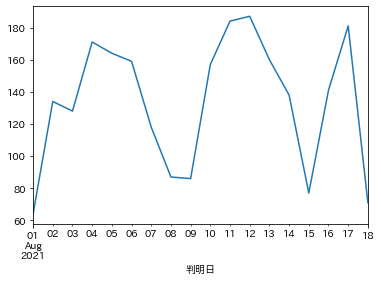

In [106]:
corona_toYear.groupby(pandas.Grouper(key='判明日', freq='D')).count()['発症日'].plot()

<h2>居住地についての可視化(今月)</h2>
<pre>
多い順に10件に絞って可視化する.
</pre>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

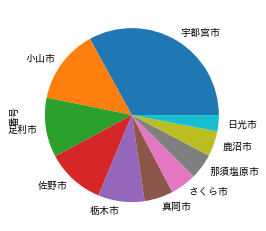

In [107]:
corona_place=corona_toYear.groupby('居住地').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_place.plot.pie(subplots=True)

In [ ]:
corona_place

居住地
宇都宮市     647
小山市      270
足利市      217
佐野市      213
栃木市      169
真岡市      105
さくら市      95
那須塩原市     93
鹿沼市       92
日光市       59
Name: 番号, dtype: int64

<h2>年齢についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

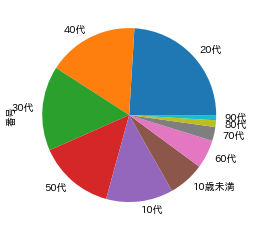

In [108]:
corona_nen=corona_toYear.groupby('年代').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_nen.plot.pie(subplots=True)

In [ ]:
corona_nen

年代
20代      578
40代      405
30代      378
50代      339
10代      300
10歳未満    161
60代      128
70代       62
80代       30
90代       23
Name: 番号, dtype: int64

<h2>性別についての可視化(今月)</h2>

array([<AxesSubplot:ylabel='番号'>], dtype=object)

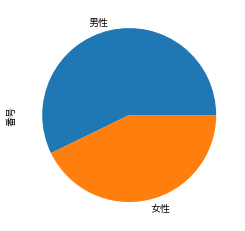

In [109]:
corona_sei=corona_toYear.groupby('性別').count().sort_values('番号',ascending=False)['番号'][0:10]
corona_sei.plot.pie(subplots=True)